Записи:
1) неплохие результаты, при умножении исходных C на 2^9 b 2^10
2) примерно то же самое, при умножении исходных I на 2^10 и 2^11

Можно выдвинуть гипотезу, что следует увличить произведение I и C примерно на 2^10

In [21]:
import numpy as np
import matplotlib.pyplot as plt 
'''
T = 1
C1 = 0.000014
C2 = 0.000033
I1 = 4.64
I2 = 6.08
R1 = 0.098
R2 = 0.15
'''

#T, C1, C2, I1, I2, R1, R2 = [1, -1, 0.07, -11, 6.08, 5, 0.15] 
T, C1, C2, I1, I2, R1, R2 = [1, 0.47, 0.07, 0.62, 6.08, 0.61, 0.15]   #данные подходят под этот случай
#T, C1, C2, I1, I2, R1, R2 = [1, -1, 0.07, -11, 6.08, 7, 0.15]
#T, C1, C2, I1, I2, R1, R2 = [1, 1, 0.07, 11, 6.08, 7, 0.15]
#T, C1, C2, I1, I2, R1, R2 = [1, 0.47, 0.07, 0.62, 6.08, 0.61, 0.15]
p = 1

matrix = [[0,1,0,0],[-T*T/(C1* I1),-R1*T/I1,0,0],[0,0,0,1],[0,0,-T*T/(C2* I2),-R2*T/I2]]
print((4*I1/C1)**0.5)
print(R1)

2.2970841831941753
0.61


найдем значения матрицы

In [22]:
eig_vals = np.linalg.eig(matrix)[0]
eig_vals

array([-0.49193548+1.7859755j , -0.49193548-1.7859755j ,
       -0.01233553+1.53279871j, -0.01233553-1.53279871j])

In [23]:
eig_vals[0].imag

1.7859754955727116

In [24]:
'''T = 1
C1 = 0.000014
C2 = 0.000033
I1 = 4.64
I2 =6.08
R1 =0.098
R2 = 0.15

for i in range(30):
  C1 = C1*2
  C2 = C2*2
  print(i, end=' ')
  matrix = [[0,1,0,0],[-T*T/(C1* I1),-R1*T/I1,0,0],[0,0,0,1],[0,0,-T*T/(C2* I2),-R2*T/I2]]
  if isinstance(np.linalg.eig(matrix)[0][0], np.complex128):
    #print(np.linalg.eig(matrix)[0])
    print('Imaginary')
  else:
    print('Real')
'''

"T = 1\nC1 = 0.000014\nC2 = 0.000033\nI1 = 4.64\nI2 =6.08\nR1 =0.098\nR2 = 0.15\n\nfor i in range(30):\n  C1 = C1*2\n  C2 = C2*2\n  print(i, end=' ')\n  matrix = [[0,1,0,0],[-T*T/(C1* I1),-R1*T/I1,0,0],[0,0,0,1],[0,0,-T*T/(C2* I2),-R2*T/I2]]\n  if isinstance(np.linalg.eig(matrix)[0][0], np.complex128):\n    #print(np.linalg.eig(matrix)[0])\n    print('Imaginary')\n  else:\n    print('Real')\n"

In [25]:
def F(a, b, x):
  return np.exp(a*x)*(np.cos(b*x)+np.sin(b*x)) + p*C1

def F1(l1, l2, x):
  return np.exp(l1*x) + np.exp(l2*x) + p*C1


def write(a1, b1, a2, b2):
  x = np.linspace(0,10,1000)
  func1 = F(a1, b1, x)
  #func2 = F(a2, b2, x)
  #print(func1)
  plt.plot(x, func1)
  plt.xlabel('T')
  plt.ylabel('V')
  #plt.plot(x, func2)
  plt.show()

def solve(eig_vals):
  a1 = eig_vals[0].real
  b1 = eig_vals[0].imag
  a2 = eig_vals[2].real
  b2 = eig_vals[2].imag
  print(a1, b1, a2, b2)
  write(a1,b1,a2,b2)

def solve_real(eig_vals):
  x = np.linspace(0,10,1000)
  func = F1(eig_vals[0], eig_vals[2], x)
  #print(func)
  plt.plot(x,func)
  plt.xlabel('T')
  plt.ylabel('V')


-0.4919354838709677 1.7859754955727116 -0.012335526315789472 1.53279871311953


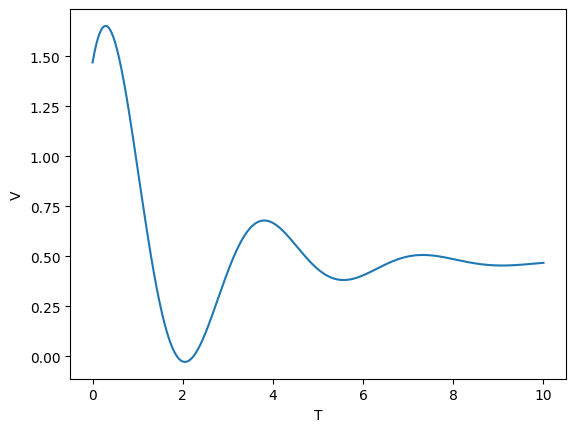

p 0.47


In [26]:
solve(eig_vals)
#solve_real(eig_vals)
print('p',p*C1)

0 Imaginary
-0.005280172413793104 62.036458148474786 -0.012335526315789463 70.59781076292242


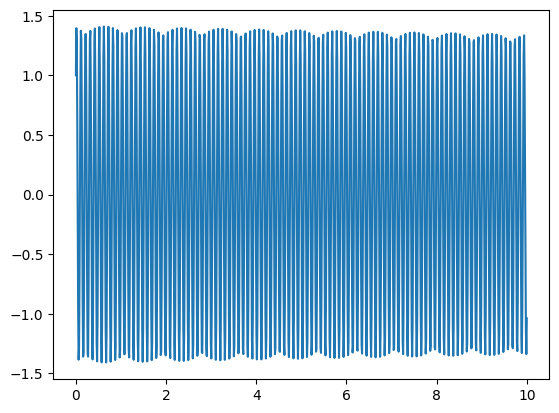

1 Imaginary
-0.002640086206896552 31.018229074237393 -0.012335526315789463 70.59781076292242


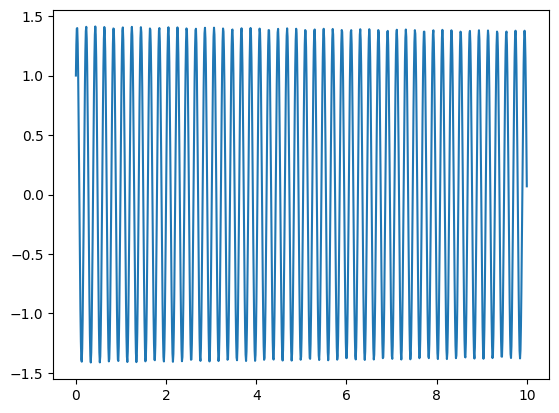

2 Imaginary
-0.001320043103448276 15.509114537118696 -0.012335526315789463 70.59781076292242


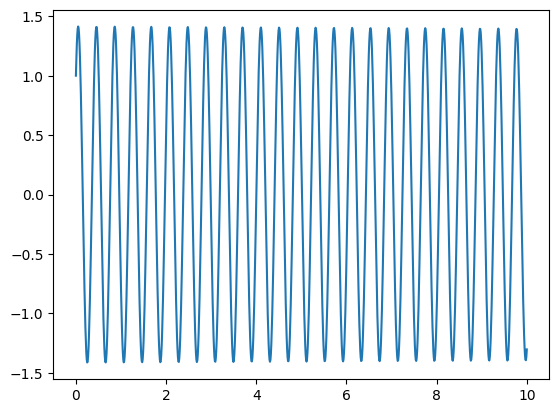

3 Imaginary
-0.000660021551724138 7.754557268559348 -0.012335526315789463 70.59781076292242


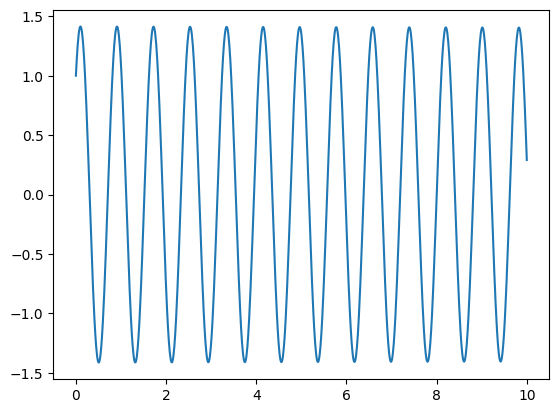

4 Imaginary
-0.000330010775862069 3.877278634279674 -0.012335526315789463 70.59781076292242


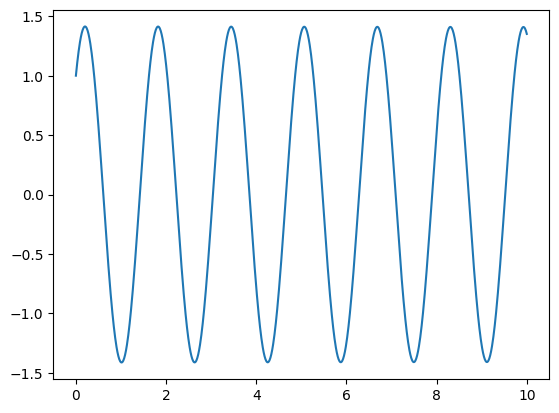

5 Imaginary
-0.0001650053879310345 1.938639317139837 -0.012335526315789463 70.59781076292242


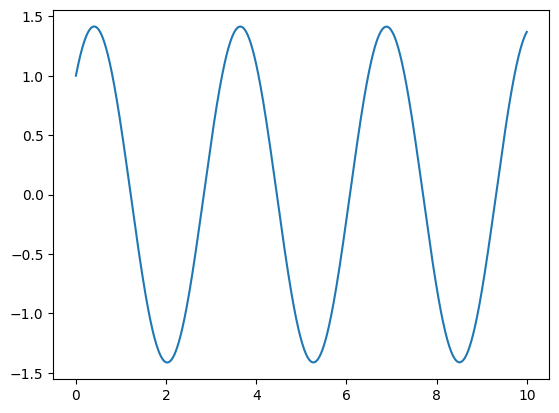

6 Imaginary
-8.250269396551724e-05 0.9693196585699185 -0.012335526315789463 70.59781076292242


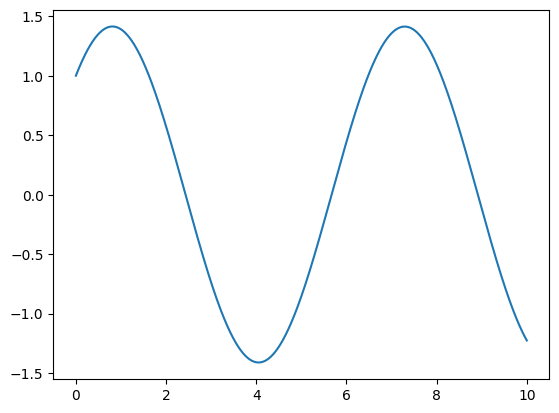

7 Imaginary
-4.125134698275862e-05 0.48465982928495926 -0.012335526315789463 70.59781076292242


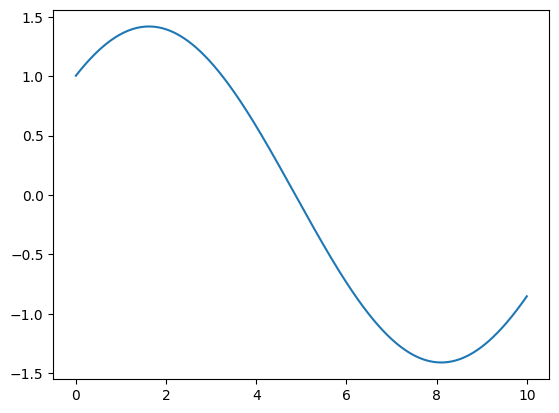

8 Imaginary
-2.062567349137931e-05 0.24232991464247963 -0.012335526315789463 70.59781076292242


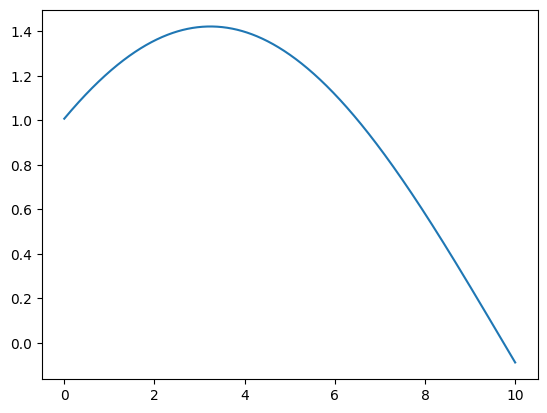

9 Imaginary
-1.0312836745689655e-05 0.12116495732123982 -0.012335526315789463 70.59781076292242


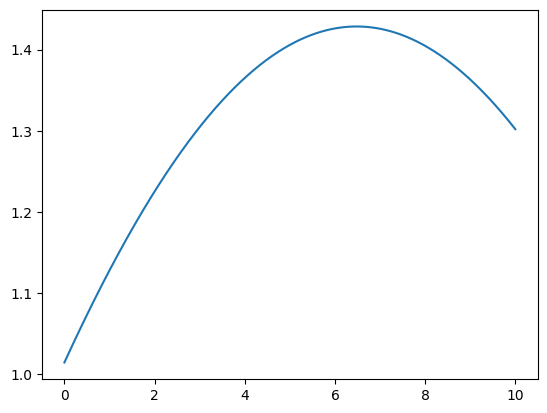

10 Imaginary
-5.156418372844828e-06 0.06058247866061991 -0.012335526315789463 70.59781076292242


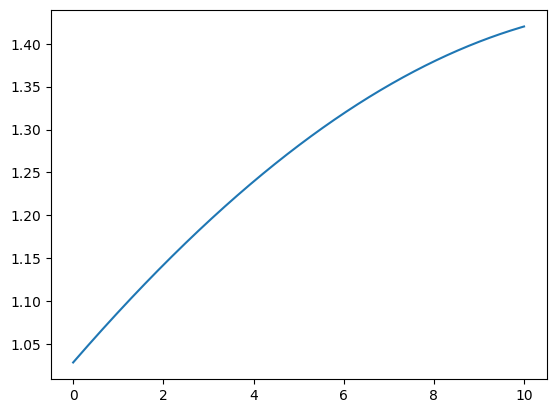

11 Imaginary
-2.578209186422414e-06 0.030291239330309954 -0.012335526315789463 70.59781076292242


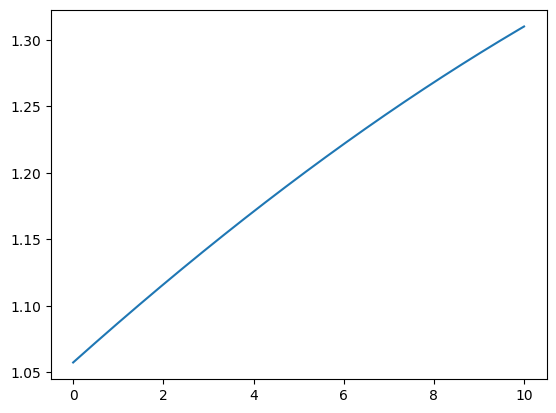

12 Imaginary
-1.289104593211207e-06 0.015145619665154977 -0.012335526315789463 70.59781076292242


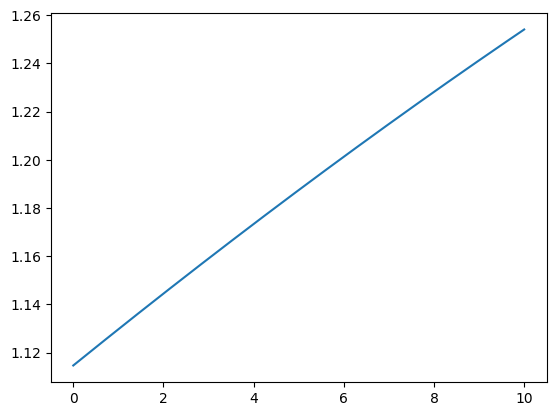

13 Imaginary
-6.445522966056035e-07 0.0075728098325774885 -0.012335526315789463 70.59781076292242


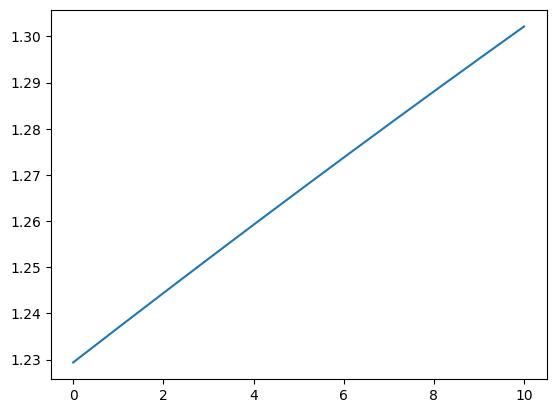

14 Imaginary
-3.2227614830280173e-07 0.0037864049162887443 -0.012335526315789463 70.59781076292242


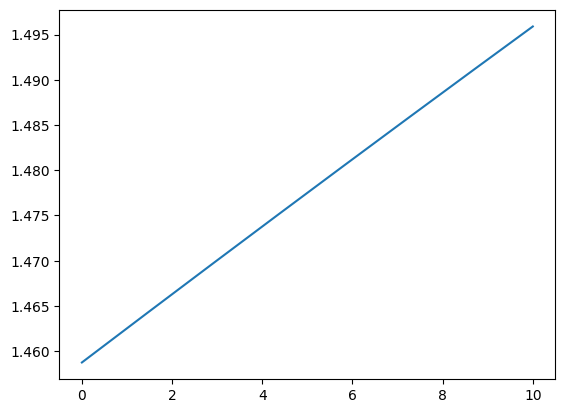

15 Imaginary
-1.6113807415140087e-07 0.0018932024581443721 -0.012335526315789463 70.59781076292242


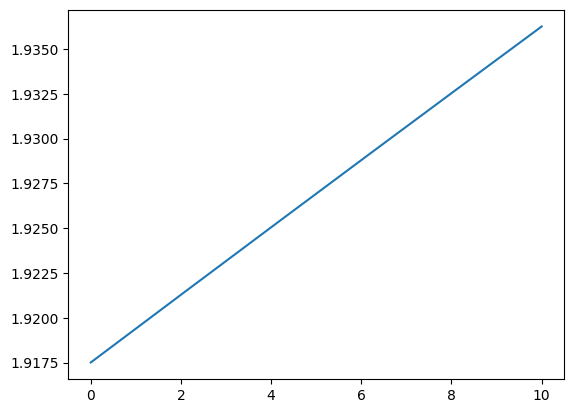

16 Imaginary
-8.056903707570043e-08 0.0009466012290721861 -0.012335526315789463 70.59781076292242


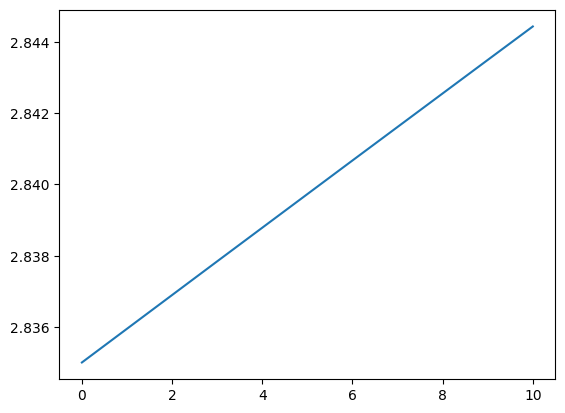

17 Imaginary
-4.0284518537850217e-08 0.00047330061453609303 -0.012335526315789463 70.59781076292242


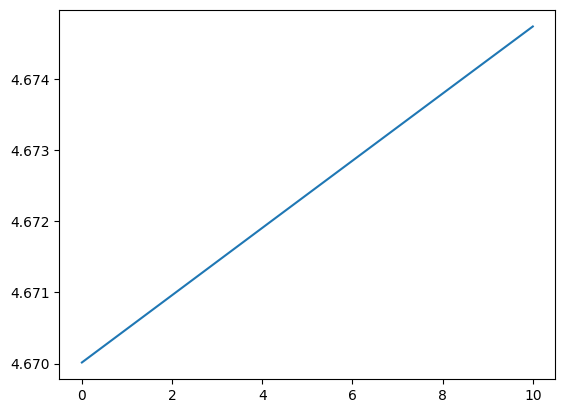

18 Imaginary
-2.0142259268925108e-08 0.00023665030726804652 -0.012335526315789463 70.59781076292242


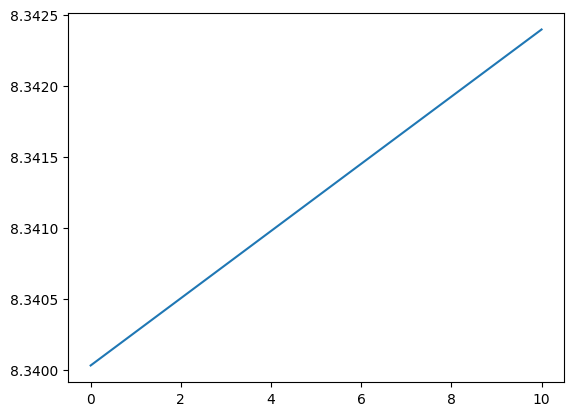

19 Imaginary
-1.0071129634462554e-08 0.00011832515363402326 -0.012335526315789463 70.59781076292242


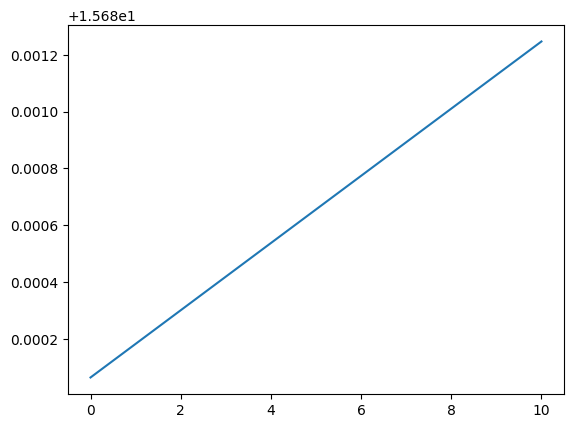

20 Imaginary
-5.035564817231277e-09 5.916257681701163e-05 -0.012335526315789463 70.59781076292242


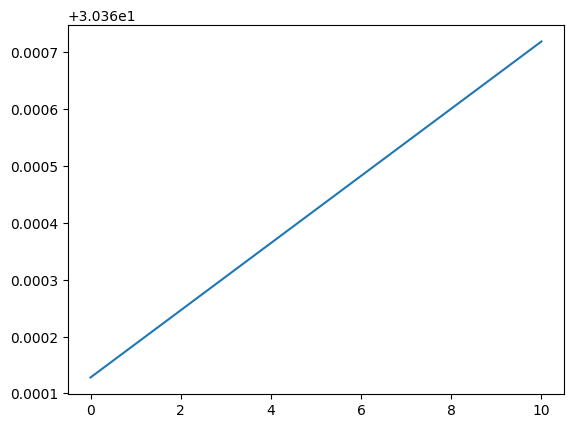

21 Imaginary
-2.5177824086156385e-09 2.9581288408505815e-05 -0.012335526315789463 70.59781076292242


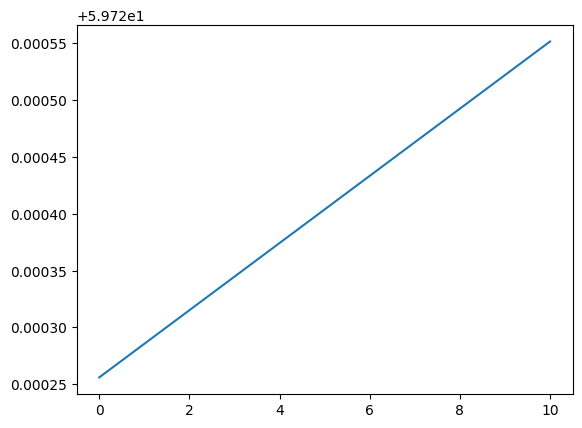

22 Imaginary
-1.2588912043078193e-09 1.4790644204252907e-05 -0.012335526315789463 70.59781076292242


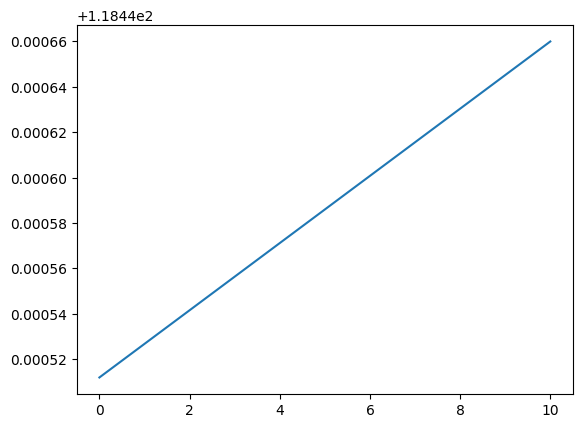

23 Imaginary
-6.294456021539096e-10 7.395322102126454e-06 -0.012335526315789463 70.59781076292242


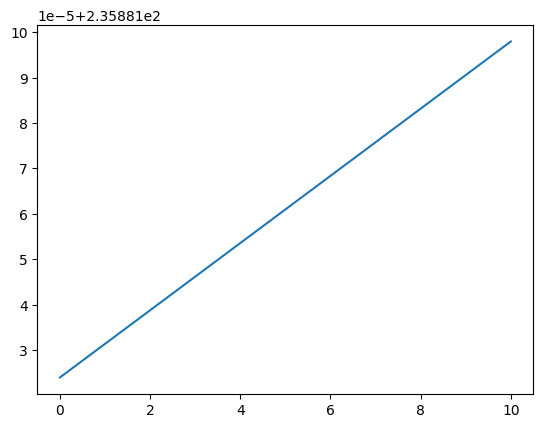

24 Imaginary
-3.147228010769548e-10 3.697661051063227e-06 -0.012335526315789463 70.59781076292242


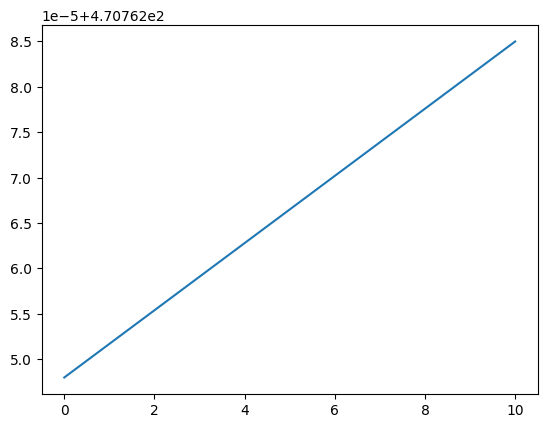

25 Imaginary
-1.573614005384774e-10 1.8488305255316134e-06 -0.012335526315789463 70.59781076292242


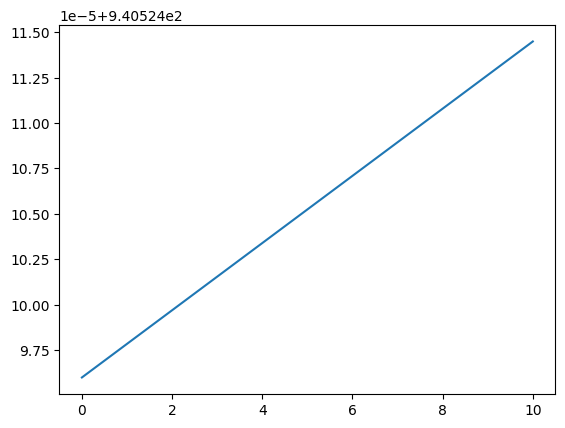

26 Imaginary
-7.86807002692387e-11 9.244152627658067e-07 -0.012335526315789463 70.59781076292242


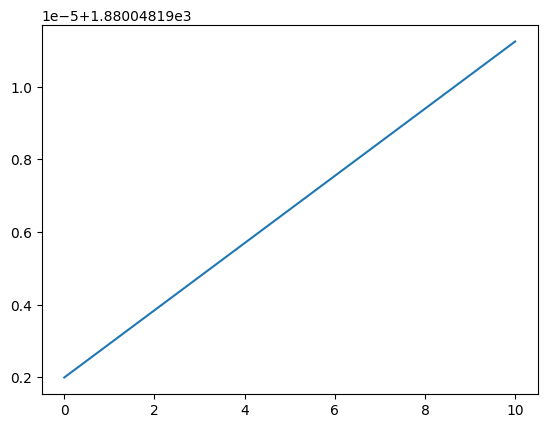

27 Imaginary
-3.934035013461935e-11 4.6220763138290335e-07 -0.012335526315789463 70.59781076292242


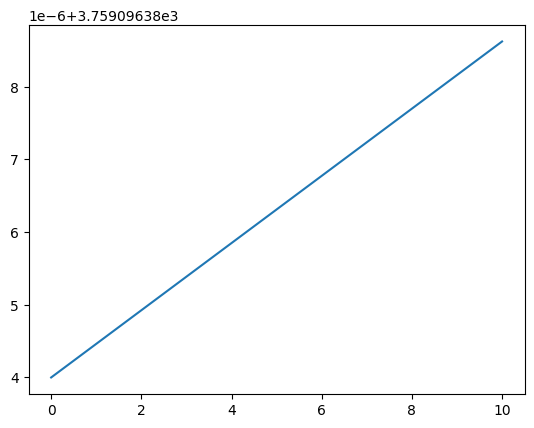

28 Imaginary
-1.9670175067309676e-11 2.3110381569145168e-07 -0.012335526315789463 70.59781076292242


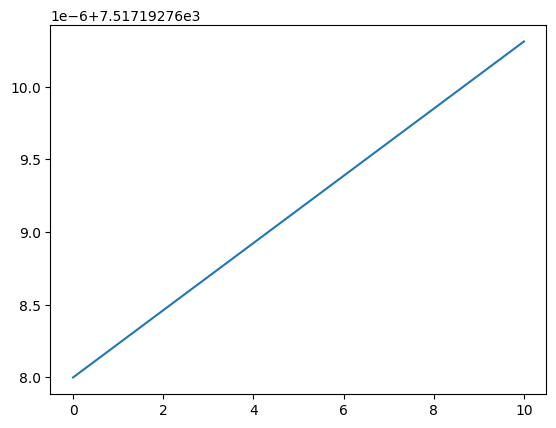

29 Imaginary
-9.835087533654838e-12 1.1555190784572584e-07 -0.012335526315789463 70.59781076292242


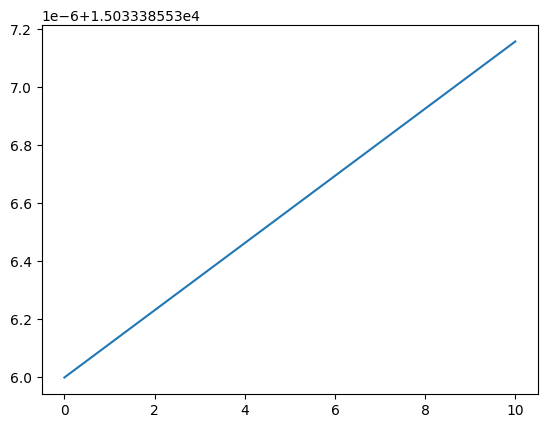

In [336]:
T = 1
C1 = 0.000014
C2 = 0.000033
I1 = 4.64
I2 =6.08
R1 =0.098
R2 = 0.15

for i in range(30):
  C1 = C1*2
  I1 = I1*2
  print(i, end=' ')
  matrix = [[0,1,0,0],[-T*T/(C1* I1),-R1*T/I1,0,0],[0,0,0,1],[0,0,-T*T/(C2* I2),-R2*T/I2]]
  if isinstance(np.linalg.eig(matrix)[0][0], np.complex128):
    #print(np.linalg.eig(matrix)[0])
    print('Imaginary')
    solve(np.linalg.eig(matrix)[0])
  else:
    print('Real')

Text(0.5, 0, 'R')

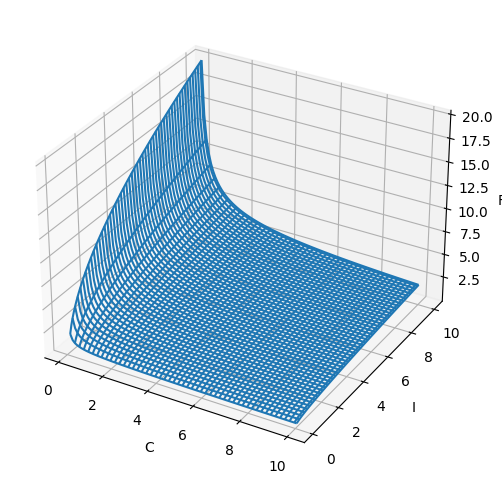

In [337]:
C = np.linspace(0.1, 10, 100)
I = np.linspace(0.1, 10, 100)
c_gr,i_gr = np.meshgrid(C,I)
R = (4*i_gr/c_gr)**0.5
#plt.plot(C,I,R)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(c_gr,i_gr,R)
ax.set_xlabel('C')
ax.set_ylabel('I')
ax.set_zlabel('R')


#ax.plot(c_gr,i_gr,R, label='parametric curve')
